In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.6e-19 #charge of electron in coloumbs
c = 3e8     #speed of light in m/s
v_values = [0.1*c, 0.9*c, 0.999*c] #velocities in m/s
t = 0       #considered time is 0 as the shape of lines does not change with respect to time 

# 3D grid to create vectors
x = np.linspace(-1, 1, 8) #creates 100 eually spaces points between -2 and 2
y = np.linspace(-1, 1, 8)
z = np.linspace(-1, 1, 8)
X, Y, Z = np.meshgrid(x, y, z) #creates (x,y,z) ponts from above arrays of x,y and z.

for v in v_values:
# Electric Field components
    beta = v / c
    R = np.sqrt((X - v*t)**2 + Y**2 + Z**2)
    denom = (R - beta*(X - v*t))**3
    Ex = q * (1 - beta**2) * ((X - v*t) - beta*R) / denom
    Ey = q * (1 - beta**2) * Y / denom
    Ez = q * (1 - beta**2) * Z / denom
# Normalize field (gives direction of the field)
    Emag = np.sqrt(Ex**2 + Ey**2 + Ez**2)
    Emag = np.where(Emag == 0, 1, Emag)
    Ex, Ey, Ez = Ex / Emag, Ey / Emag, Ez / Emag
# Create 3D quiver plot
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(X, Y, Z, Ex, Ey, Ez, length=0.2, normalize=True, color='#A23BEC')

    ax.plot(0, 0, 0, 'ro', label='Charge Position')
    ax.set_title(f'Electric Field (v = {v/c:.3f} c)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend()

plt.show()



In [ ]:
for v in v_values:
    beta = v / c
    R = np.sqrt((X - v*t)**2 + Y**2 + Z**2)
    denom = (R - beta*(X - v*t))**3

    # Magnetic field components
    Bx = np.zeros_like(X)
    By = -q * (1 - beta**2) * Z * beta / denom
    Bz =  q * (1 - beta**2) * Y * beta / denom

    # Normalize for visualization
    B_mag = np.sqrt(Bx**2 + By**2 + Bz**2)
    Bx, By, Bz = Bx/B_mag, By/B_mag, Bz/B_mag

    # Create 3D quiver plot
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(X, Y, Z, Bx, By, Bz, length=0.2, normalize=True, color='#A23BEC')

    ax.plot(0, 0, 0, 'ro', label='Charge Position')
    ax.set_title(f'Magnetic Field (v = {v/c:.3f} c)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend()

plt.show()


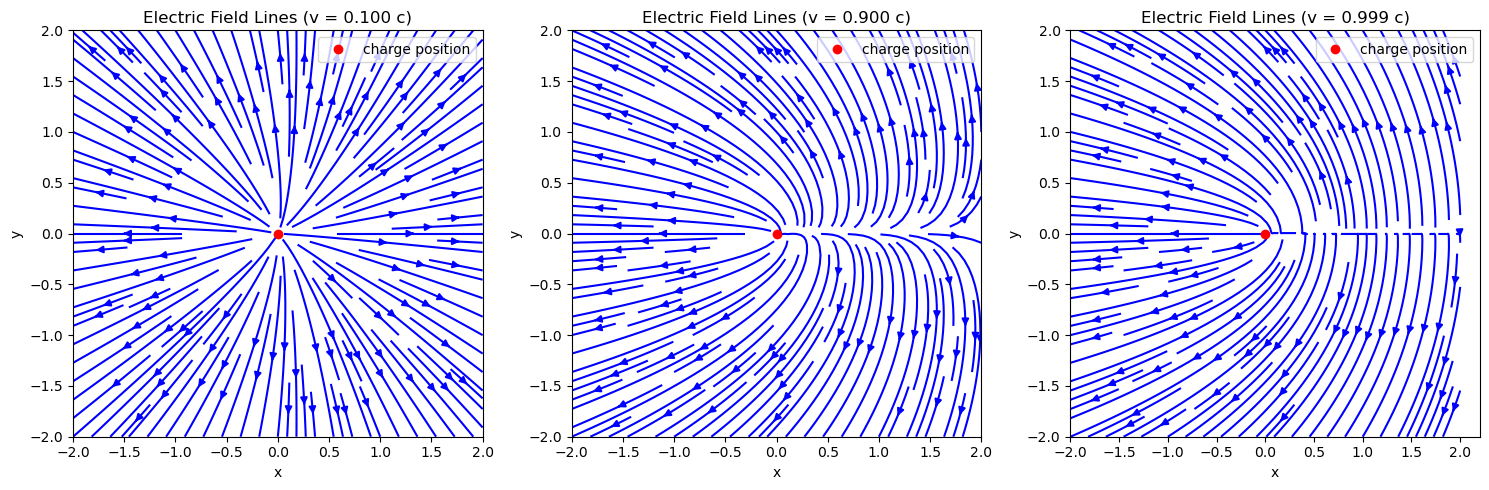

In [8]:
#visualizing the Electric field lines in 2-D for oberserving the beaming effect clearly

X, Y= np.meshgrid(x, y)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, v in enumerate(v_values):
    beta = v / c
    R = np.sqrt((X - v*t)**2 + Y**2)
    denom = (R - beta*(X - v*t))**3
    # Electric field components
    Ex = q * (1 - beta**2) * ((X - v*t) - beta*R) / denom
    Ey = q * (1 - beta**2) * Y / denom
    # normalize for streamplot
    E_mag = np.sqrt(Ex**2 + Ey**2)
    Exn = Ex / E_mag
    Eyn = Ey / E_mag
    # Plot 
    axes[i].streamplot(X, Y, Exn, Eyn, color='blue', density=1.5)
    axes[i].plot(0, 0, 'ro',label='charge position')
    axes[i].set_title(f'Electric Field Lines (v = {v/c:.3f} c)')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].legend(loc='upper right')
plt.tight_layout()
plt.show()
